In [72]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
from sklearn.preprocessing import label_binarize


from sklearn.tree import DecisionTreeClassifier

In [4]:
os.getcwd()

'C:\\Users\\galloul\\Desktop\\Task5'

# Face Detection using Haar-Features Fed to a Cascaded Classifier

> Documentation [HERE](https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html)

In [35]:
clf_xml = 'haarcascade_frontalface_default.xml'
clf = cv2.CascadeClassifier(clf_xml)
clf

<CascadeClassifier 00000139F9D64B50>

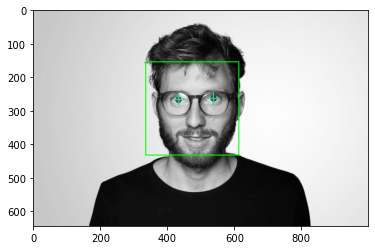

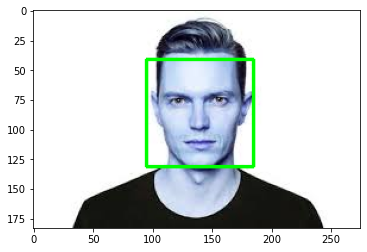

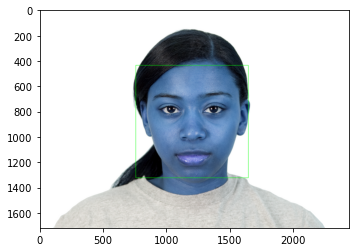

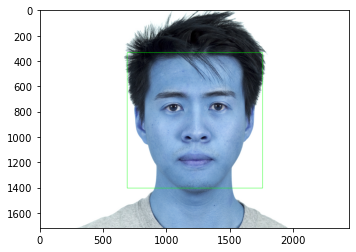

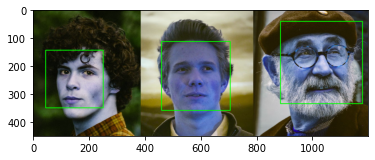

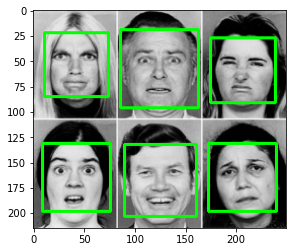

In [43]:
for frame in glob.glob(os.getcwd()+'/*.jpg'):
    
    frame = cv2.imread(frame)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = clf.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
    
    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    plt.imshow(frame)
    plt.show()

# ROC Curve and AUC

In [82]:
features, target = load_digits(return_X_y=True)
target = label_binarize(target, classes=np.linspace(0, 9, 10)) # one-hot encoding for the target variable
target

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [83]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0, test_size=0.2)

In [132]:
# clf = DecisionTreeClassifier().fit(X_train, y_train)
clf = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=0))
y_predict = classifier.fit(X_train, y_train).decision_function(X_test)
y_predict

array([[-3.58459897, -0.31176426,  1.78242707],
       [-2.15411929,  1.11402775, -2.393737  ],
       [ 1.89199335, -3.89624382, -6.29685764],
       [-4.52609987, -0.63389114,  1.96065819],
       [ 1.39684192, -1.77742447, -6.26300472],
       [-4.29544529, -1.45403694,  3.29458805],
       [ 1.60323992, -2.10436714, -6.37623283],
       [-2.65028866, -1.23856217, -0.51739315],
       [-2.86540149, -0.51680531, -0.7183625 ],
       [-1.98461469, -0.42890191, -1.70646586],
       [-3.74016002,  0.49686389,  0.82186705],
       [-2.38375773, -1.40495745, -0.60548048],
       [-2.64026621, -0.18330583, -0.76615536],
       [-2.6974942 , -0.48066147, -0.71100338],
       [-2.68086321, -0.48075311, -0.42256446],
       [ 1.65255174, -2.20173405, -6.40562627],
       [-2.52210662, -0.53055015, -0.52952971],
       [-2.41636546,  0.45117003, -0.99069072],
       [ 1.25101273, -0.81698465, -6.36116848],
       [ 1.74739869, -3.24458567, -6.25493848],
       [-3.18923262, -0.1604106 ,  1.000

In [140]:
np.unique(y_predict[:,0])

array([-4.52609987, -4.52363081, -4.29544529, -4.20604454, -4.06399205,
       -4.0207076 , -4.01286452, -3.78787453, -3.74016002, -3.63492783,
       -3.63282155, -3.58459897, -3.57813571, -3.43187065, -3.43179756,
       -3.42685942, -3.40478132, -3.38909428, -3.27471138, -3.18981379,
       -3.18923262, -3.18066308, -3.02357691, -3.01486208, -2.86540149,
       -2.86002748, -2.77345858, -2.6974942 , -2.68086321, -2.65028866,
       -2.64026621, -2.57396061, -2.56539107, -2.52835238, -2.52210662,
       -2.45158845, -2.44243775, -2.41636546, -2.38375773, -2.30742967,
       -2.23785545, -2.21454281, -2.16443233, -2.15411929, -2.11381288,
       -2.02891529, -2.01606098, -1.98461469, -1.94176612, -1.92528041,
       -1.87262777, -1.71132902, -1.50834493, -1.35409061,  1.00481639,
        1.10714364,  1.14904826,  1.1631371 ,  1.17795239,  1.20373409,
        1.25101273,  1.26350425,  1.32668652,  1.39684192,  1.43990798,
        1.50672255,  1.53519081,  1.53976616,  1.60323992,  1.65

In [87]:
TP

array([24, 30, 30, 26, 26, 35, 42, 38, 27, 34], dtype=int64)

In [88]:
FP

array([3, 4, 7, 9, 3, 4, 3, 4, 4, 7], dtype=int64)

In [133]:
def roc_curve_scratch(y_test, y_predict):
    TPR = []
    FPR = []
    
    for class_ in range(y_test.shape[1]):
        
        y_true, y_pred = y_test[:, class_], y_predict[:, class_]
        
        fp = np.sum((y_pred == 1) & (y_true == 0))
        tp = np.sum((y_pred == 1) & (y_true == 1))

        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))
        
        FPR.append(fp / (fp + tn))
        TPR.append(tp / (tp + fn))
        
    return TPR, FPR 

In [134]:
TPR, FPR = roc_curve_scratch(y_test, y_predict)
TPR

C:\Users\galloul\AppData\Local\Temp\ipykernel_21064\3741604413.py:15: RuntimeWarning: invalid value encountered in long_scalars
  FPR.append(fp / (fp + tn))
C:\Users\galloul\AppData\Local\Temp\ipykernel_21064\3741604413.py:16: RuntimeWarning: invalid value encountered in long_scalars
  TPR.append(tp / (tp + fn))


[nan, nan, nan]

In [123]:
def AUC(x, y):
    # by using simple trapezoidal rule (for non-even steps between x values)
    s = 0.0
    for k in range(len(x) - 1):
        s += (x[k+1] - x[k]) * (y[k+1] + y[k]) / 2
    return s

In [124]:

fig, axes = plt.subplots(2, clf.n_classes_//2, figsize=(40, 15))


for i, axs in enumerate(axes):
    

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

0 [0. 0. 0. 1.]
[ 3.02104714  2.02104714  1.00481639 -4.52609987]
[-4.52609987 -4.52363081 -4.29544529 -4.20604454 -4.06399205 -4.0207076
 -4.01286452 -3.78787453 -3.74016002 -3.63492783 -3.63282155 -3.58459897
 -3.57813571 -3.43187065 -3.43179756 -3.42685942 -3.40478132 -3.38909428
 -3.27471138 -3.18981379 -3.18923262 -3.18066308 -3.02357691 -3.01486208
 -2.86540149 -2.86002748 -2.77345858 -2.6974942  -2.68086321 -2.65028866
 -2.64026621 -2.57396061 -2.56539107 -2.52835238 -2.52210662 -2.45158845
 -2.44243775 -2.41636546 -2.38375773 -2.30742967 -2.23785545 -2.21454281
 -2.16443233 -2.15411929 -2.11381288 -2.02891529 -2.01606098 -1.98461469
 -1.94176612 -1.92528041 -1.87262777 -1.71132902 -1.50834493 -1.35409061
  1.00481639  1.10714364  1.14904826  1.1631371   1.17795239  1.20373409
  1.25101273  1.26350425  1.32668652  1.39684192  1.43990798  1.50672255
  1.53519081  1.53976616  1.60323992  1.65255174  1.66758542  1.74739869
  1.79416836  1.89199335  2.02104714]
1 [0.         0.     

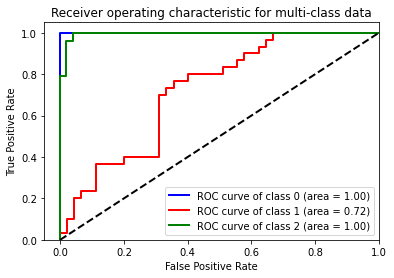

In [141]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    print(i, fpr[i])
    print(_)
    print(np.unique(y_score[:, i]))
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [151]:
x = np.array([1, 2, 4, 0])
x[::-1]

array([0, 4, 2, 1])

In [155]:
xx = np.argsort(x, kind='mergesort')[::-1]
xx

array([2, 1, 0, 3], dtype=int64)

In [156]:
x = x[xx]
x

array([4, 2, 1, 0])

In [162]:
x= np.where(np.diff(x))
x

(array([0, 1, 2], dtype=int64),)